### 상관분석

In [ ]:
#판다스 라이브러리 불러오기
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

#데이터불러오기
file_path= '/content/drive/MyDrive/Colab Notebooks/ml_2024/data/exam_sample_cor.csv'

#read csv()함수로 데이터프레임 변환
df = pd.read_csv(file_path)
df

,student_no,class,science,english,math,sex
0,1,A,92,98,97,m
1,2,A,62,66,65,w
2,3,A,81,86,84,w
3,4,A,73,72,71,m
4,5,B,65,66,69,w
5,6,B,86,89,87,m
6,7,B,91,90,92,m
7,8,B,77,78,76,w
8,9,C,95,98,99,w
9,10,C,83,82,85,w


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


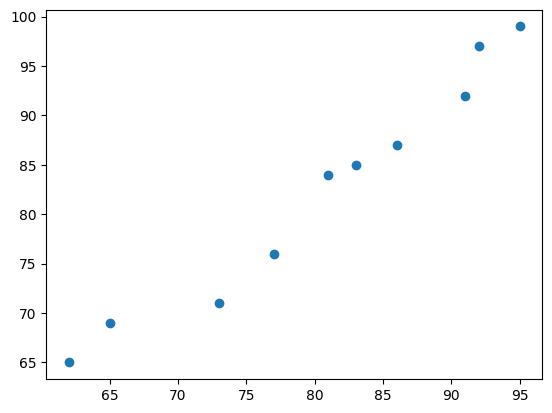

In [ ]:
# 두 연속형 변수 스캐터플롯 그리기
plt.scatter(df.science, df.math)

In [ ]:
# 상관계수 확인
numerical_df = df.select_dtypes(include=['number'])
corr = numerical_df.corr() #(method = 'pearson')

<Axes: >

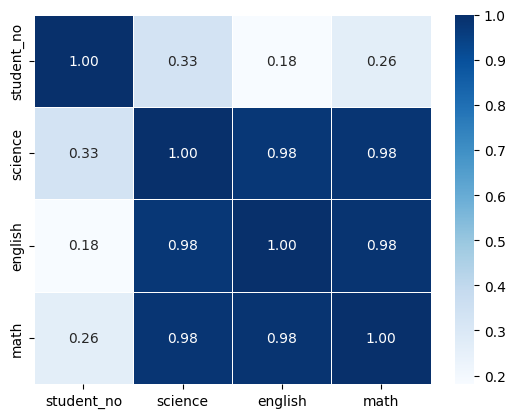

In [ ]:
# 히트맵으로 상관도 시각화
sns.heatmap(data = corr , annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

<Axes: >

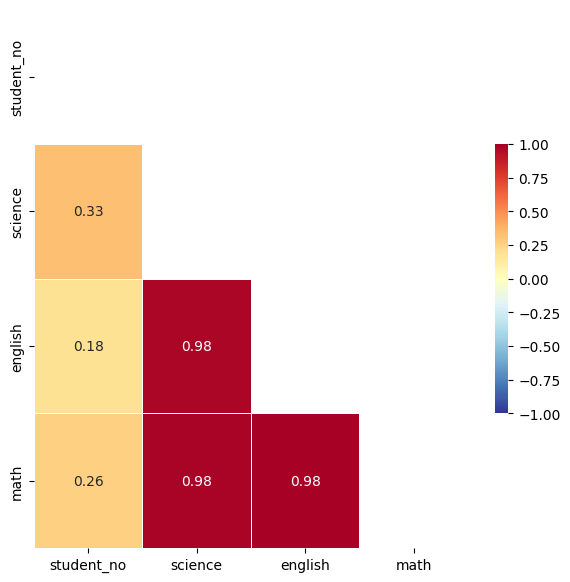

In [ ]:
df1 = numerical_df.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 삼각형 True, 아래 삼각형 False)
mask = np.zeros_like(df1, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df1, cmap = 'RdYlBu_r',
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1 )  # 컬러바 범위 -1 ~ 1

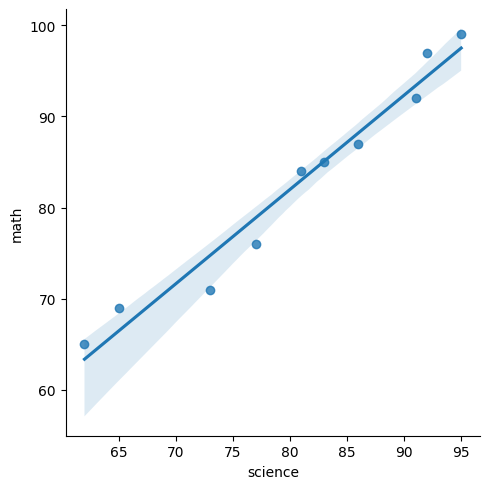

In [ ]:
sns.lmplot(x='science', y='math',data=df)

In [ ]:
# 회귀분석을 위해 종속(Y=수학), 독립(X=과학)
# 과학점수를 알면 수학점수를 예상 할 수 있다.
# 단순선형회귀 모형
import statsmodels.api as sm
lin_reg = sm.OLS.from_formula("math ~ science", df).fit()
lin_reg.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   math   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     218.5
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           4.32e-07
Time:                        12:13:27   Log-Likelihood:                -21.673
No. Observations:                  10   AIC:                             47.35
Df Residuals:                       8   BIC:                             47.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7527      5.682     -0.132      0.898     -13.855      12.349
science        1.0342      0.070     14.781      0.000       0.873       1.196
==============================================================================
Omnibus:                        1.170   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.557   Jarque-Bera (JB):                0.811
Skew:                          -0.402   Prob(JB):                        0.667
Kurtosis:                       1.859   Cond. No.                         618.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
math_predict = lin_reg.predict(88)
math_predict

NameError: name 'lin_reg' is not defined